In [1]:
import pandas as pd
import numpy as np
from numpy import abs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('sonar.csv')
data=pd.read_csv('sonar.csv',names=range(0,61),header=0)
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:

data.info


<bound method DataFrame.info of          0       1       2       3       4       5       6       7       8   \
0    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
202  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
203  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
204  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
205  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
206  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...   

In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


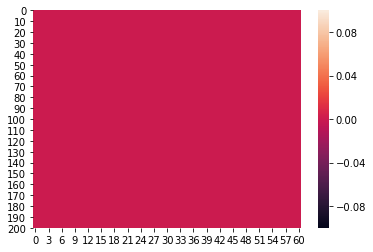

In [5]:
import seaborn as sns
sns.heatmap(data.isnull())


In [6]:
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

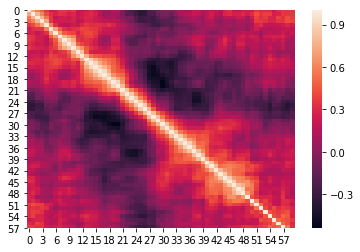

In [7]:
sns.heatmap(data.corr())

In [8]:
from sklearn.decomposition import PCA
X=data.iloc[:,0:-1]
pca=PCA(10)
Y=data.iloc[:,-1]

In [9]:
pcax=pca.fit_transform(X)
x=pcax

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(Y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
from sklearn.metrics import mean_squared_error,r2_score
max_rsocre=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    r2sc=r2_score(y_test,y_pred)
    if r2sc>max_rsocre:
        max_rsocre=r2sc
        final=r
print(lg.score(x_train,y_train))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("maxrscr for",final,'is',max_rsocre)
from sklearn.model_selection import cross_val_score
print(cross_val_score(lg,x,y,cv=5).mean())

0.7806451612903226
0.7307692307692307
[[20  3]
 [11 18]]
              precision    recall  f1-score   support

           0       0.65      0.87      0.74        23
           1       0.86      0.62      0.72        29

    accuracy                           0.73        52
   macro avg       0.75      0.75      0.73        52
weighted avg       0.76      0.73      0.73        52

maxrscr for 77 is 0.30666666666666664
0.6398184912081679


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45)
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
r2sc=r2_score(y_test,y_pred)
r2sc

0.1525925925925925

In [13]:
max_rsocre=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r)
    kn=KNeighborsClassifier()
    kn.fit(x_train,y_train)
    y_pred=kn.predict(x_test)
    r2sc=r2_score(y_test,y_pred)
    if r2sc>max_rsocre:
        max_rsocre=r2sc
        final_state=r
print(kn.score(x_train,y_train))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("maxrscr for",final_state,'is',max_rsocre)
from sklearn.model_selection import cross_val_score
print(cross_val_score(kn,x,y,cv=5).mean())

0.8387096774193549
0.7307692307692307
[[20  3]
 [11 18]]
              precision    recall  f1-score   support

           0       0.65      0.87      0.74        23
           1       0.86      0.62      0.72        29

    accuracy                           0.73        52
   macro avg       0.75      0.75      0.73        52
weighted avg       0.76      0.73      0.73        52

maxrscr for 59 is 0.5125
0.5116279069767442


In [14]:
max_rsocre=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r)
    sv=SVC()
    sv.fit(x_train,y_train)
    y_pred=sv.predict(x_test)
    r2sc=r2_score(y_test,y_pred)
    if r2sc>max_rsocre:
        max_rsocre=r2sc
        final_state=r
print(sv.score(x_train,y_train))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("maxrscr for",final_state,'is',max_rsocre)

from sklearn.model_selection import cross_val_score
print(cross_val_score(sv,x,y,cv=5).mean())

0.8129032258064516
0.6730769230769231
[[21  2]
 [15 14]]
              precision    recall  f1-score   support

           0       0.58      0.91      0.71        23
           1       0.88      0.48      0.62        29

    accuracy                           0.67        52
   macro avg       0.73      0.70      0.67        52
weighted avg       0.75      0.67      0.66        52

maxrscr for 59 is 0.5125
0.6007941009642654


In [15]:
max_rsocre=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r)
    dc=DecisionTreeClassifier()
    dc.fit(x_train,y_train)
    y_pred=dc.predict(x_test)
    r2sc=r2_score(y_test,y_pred)
    if r2sc>max_rsocre:
        max_rsocre=r2sc
        final_state=r
print(dc.score(x_train,y_train))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("maxrscr for",final_state,'is',max_rsocre)

from sklearn.model_selection import cross_val_score
print(cross_val_score(dc,x,y,cv=5).mean())

1.0
0.6730769230769231
[[15  8]
 [ 9 20]]
              precision    recall  f1-score   support

           0       0.62      0.65      0.64        23
           1       0.71      0.69      0.70        29

    accuracy                           0.67        52
   macro avg       0.67      0.67      0.67        52
weighted avg       0.67      0.67      0.67        52

maxrscr for 50 is 0.5272727272727273
0.5276233692569484


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [17]:
gbr=GradientBoostingRegressor(learning_rate=0.001,n_estimators=10)
print('cors_val_score mean:',cross_val_score(gbr,x,y,cv=5).mean())
print('cors_val_score std:',cross_val_score(gbr,x,y,cv=5).std())

cors_val_score mean: -0.04350457480272176
cors_val_score std: 0.08700914960544352


In [18]:
from sklearn.externals import joblib
joblib.dump(sv,'sonar.pk1')

['sonar.pk1']